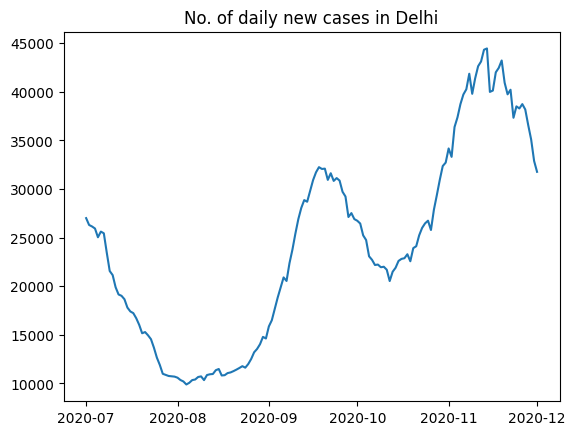

c:\users\dishant\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (4,30,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


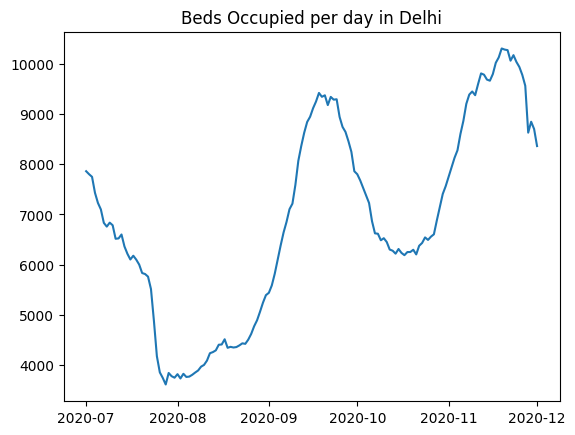

Correlation between daily new cases and hospitalizations: 0.96
Degree coresponding to Minimum Root Mean Percentage Error: 3


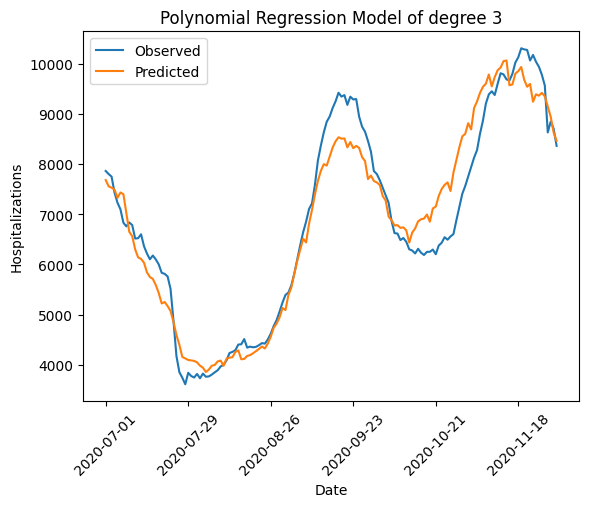

Minimum Mean Percentage Error: 22.11689688974009
Minimum Root Mean squared Error: 525.107665896541


In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

start_date = pd.to_datetime('2020-07-01')
end_date = pd.to_datetime('2020-12-01')

# Load data
cases = pd.read_csv(r"C:\Users\Dishant\Desktop\Untitled Folder\states.csv")
cases = cases.loc[cases["State"] == "Delhi"]
cases["Date"] = pd.to_datetime(cases["Date"], format="%Y-%m-%d")
cases.set_index("Date", inplace=True)
cases = cases["Confirmed"]-cases["Recovered"]-cases["Deceased"]
cases_train = cases.loc[start_date:end_date]
plt.plot(cases_train.index, cases_train)
plt.title('No. of daily new cases in Delhi')
plt.show()

hospitalized = pd.read_csv(r"C:\Users\Dishant\Desktop\Untitled Folder\statewise_tested_numbers_data.csv - statewise_tested_numbers_data.csv.csv")
hospitalized = hospitalized[hospitalized.State == "Delhi"]
hospitalized.index = pd.to_datetime(hospitalized["Updated On"], format="%d/%m/%Y")
hospitalized.fillna(hospitalized["Beds_Occupied"].median(), inplace=True)
hospitalized = hospitalized["Beds_Occupied"]
hospitalized_train = hospitalized.loc['2020-07-01':'2020-12-01']
plt.plot(hospitalized_train.index, hospitalized_train)
plt.title('Beds Occupied per day in Delhi')
plt.show()

correlation = cases_train.corr(hospitalized_train)
print(f"Correlation between daily new cases and hospitalizations: {correlation:.2f}")

error=[]
for i in range(int(10)):
    X = np.array(cases_train).reshape(-1, 1)
    y = np.array(hospitalized_train).reshape(-1, 1)
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X)
    reg = LinearRegression().fit(X_poly, y)

    # Make predictions
    end_date = pd.to_datetime('2020-12-01')
    cases_test = cases.loc[start_date:end_date]
    hospitalized_test = hospitalized.loc[start_date:end_date]
    X_test = np.array(cases_test).reshape(-1, 1)
    X_poly_test = poly.transform(X_test)
    y_pred = reg.predict(X_poly_test)

    mse = mean_squared_error(hospitalized_train, y_pred)
    
    error.append(np.sqrt(mse))


for i in range(10):
    if error[i] == min(error):
        print("Degree coresponding to Minimum Root Mean Percentage Error:", i)
    else:
        continue

X = np.array(cases_train).reshape(-1, 1)
y = np.array(hospitalized_train).reshape(-1, 1)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
reg = LinearRegression().fit(X_poly, y)

# Make predictions
end_date = pd.to_datetime('2020-12-01')
cases_test = cases.loc[start_date:end_date]
hospitalized_test = hospitalized.loc[start_date:end_date]
X_test = np.array(cases_test).reshape(-1, 1)
X_poly_test = poly.transform(X_test)
y_pred = reg.predict(X_poly_test)

# Plot the results
plt.plot(hospitalized_test.index, hospitalized_test, label='Observed')
plt.plot(hospitalized_test.index, y_pred, label='Predicted')
plt.xticks(hospitalized_test.index[::28], rotation=45)
plt.xlabel('Date')
plt.ylabel('Hospitalizations')
plt.title('Polynomial Regression Model of degree 3')
plt.legend()
plt.show()

n = len(hospitalized_test)
mpe = (1/n) * np.sum(np.abs(hospitalized_test[1] - y_pred)/hospitalized_test[1]) * 100
print("Minimum Mean Percentage Error:", mpe)

mse = mean_squared_error(hospitalized_train, y_pred)
print("Minimum Root Mean squared Error:", np.sqrt(mse))